### example of QCL structure  
- Using meep to construct the QCL structure  
- By piling different materials on the geometry list  
- This is an enlarged image of the structure  

In [ ]:
import meep as mp
import numpy as np
from meep.materials import Ti,Au,GaAs

resolution = 50
sx = 12
sy = 5
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(0.1)]

# 各层厚度（单位：μm）
padge_thickness = 0.08
ngaas_thickness = 0.1
ti_thickness = 0.02
au_thickness = 0.18
core_thickness = 2.5
substrate_thickness = 1.0

# 材料定义（近似 ε = n^2）
si_gaas = mp.Medium(epsilon=12.9)
qcl_core = mp.Medium(epsilon=13.0)
pdge = mp.Medium(epsilon=10.0)


geometry = []

# Substrate
geometry.append(mp.Block(
    material=si_gaas,
    size=mp.Vector3(mp.inf, substrate_thickness),
    center=mp.Vector3(y=-sy/2 + substrate_thickness/2)
))

# QCL active region
geometry.append(mp.Block(
    material=qcl_core,
    size=mp.Vector3(mp.inf, core_thickness),
    center=mp.Vector3(y=-sy/2 + substrate_thickness + core_thickness/2)
))

# 上层金属叠层
y0 = -sy/2 + substrate_thickness + core_thickness
geometry += [
    mp.Block(material = pdge, size = mp.Vector3(mp.inf, padge_thickness), center = mp.Vector3(y=y0 + padge_thickness/2)),
    mp.Block(material = GaAs, size = mp.Vector3(mp.inf, ngaas_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness/2)),
    mp.Block(material = Ti, size = mp.Vector3(mp.inf, ti_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness + ti_thickness/2)),
    mp.Block(material = Au, size = mp.Vector3(mp.inf, au_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness + ti_thickness + au_thickness/2))
]


# Source
sources = [mp.Source(
    src=mp.GaussianSource(frequency=1/0.1, fwidth=0.2),
    component=mp.Ez,
    center=mp.Vector3(-3, -sy/2 + 0.5),
    size=mp.Vector3(0, 1.0)
)]

tran_fr = mp.FluxRegion(center=mp.Vector3(6))
frequencies = np.linspace(10,10,100)

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)

sim.plot2D()


### QCL material structure
- Refer to the "Electronically tunable aperiodic distributed feedback terahertz lasers"  
- The parameter of thickness the epsilon should be changed  
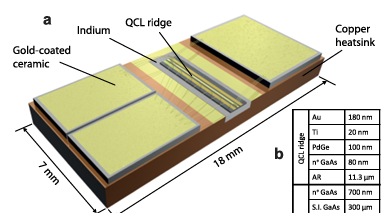

In [ ]:
import meep as mp
import numpy as np

# 各层厚度（单位：μm）
resolution = 50
sx = 700
sy = 35
sz = 120
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(1)]

# 各层厚度（单位：μm）
au_thickness = 0.18
ti_thickness = 0.02
pdge_thickness = 0.1
ngaas_thickness_1 = 0.08
Ar_thickness = 0.0113
ngaas_thickness_2 = 0.7
sigaas_thickness = 30

# 材料定义（近似 ε = n^2）
au = mp.Medium(epsilon=9.5)
ti = mp.Medium(epsilon=6.0)
pdge = mp.Medium(epsilon=10.0)
ngaas = mp.Medium(epsilon=12.5)
Ar = mp.Medium(epsilon=13.0)
si_gaas = mp.Medium(epsilon=12.9,)

geometry = []

# Substrate
geometry.append(mp.Block(
                    material=si_gaas,
                    size=mp.Vector3(sx, sigaas_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2)))

geometry.append(mp.Block(
                    material=ngaas,
                    size=mp.Vector3(sx, ngaas_thickness_2,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2)))

# QCL active region
geometry.append(mp.Block(
                    material=Ar,
                    size=mp.Vector3(sx, Ar_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2 + Ar_thickness/2)))

# 上层金属叠层
y0 = -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2 + Ar_thickness/2
geometry += [
    mp.Block(material = Ar,  
             size = mp.Vector3(sx, Ar_thickness,sz), 
             center = mp.Vector3(y=y0 + Ar_thickness/2)),
    mp.Block(material = ngaas, 
             size = mp.Vector3(sx, ngaas_thickness_1,sz), 
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2)),
    mp.Block(material = pdge,    
             size = mp.Vector3(sx, pdge_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2)),
    mp.Block(material = ti,    
             size = mp.Vector3(sx, ti_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2 + ti_thickness/2)),
    mp.Block(material = au,    
             size = mp.Vector3(sx, au_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2 + ti_thickness/2 + au_thickness/2))
]
    
# Source
sources = [mp.Source(
    src=mp.GaussianSource(frequency=1/0.1, fwidth=0.2),
    component=mp.Ez,
    center=mp.Vector3(0,0,0),
    size=mp.Vector3(0,4.0,0))]

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)


sim.plot2D()

### Grating structure
- Refer to the "Electronically tunable aperiodic distributed feedback terahertz lasers"  
- The axis is redefined z->x y->y x->z  
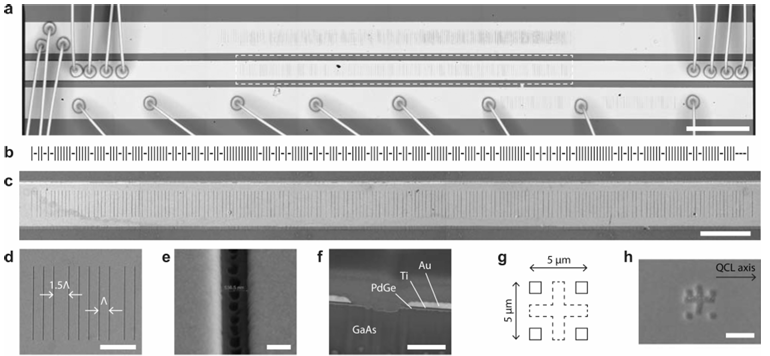

In [ ]:
import meep as mp

resolution = 50
sx = 12
sy = 10
sz = 30
cell = mp.Vector3(sx,0,sz)
pml_layers = [mp.PML(0.1)]

# 各层厚度（单位：μm）
sigaas_thickness = 5

# 材料定义（近似 ε = n^2）
si_gaas = mp.Medium(epsilon=12.9)

geometry = []

# Substrate
geometry.append(mp.Block(
                    material=si_gaas,
                    size=mp.Vector3(sigaas_thickness,sy,sz),
                    center=mp.Vector3(x = -sx/2 + sigaas_thickness/2)))

# 光栅参数
Λ = 0.5                    # 基本周期（μm）
slot_width = 0.1           # 槽宽（沿 X）
slot_depth = 5           # 镂刻深度（沿 Y）
slot_spacing = Λ / 2       # 间距
pattern = "|-||-|-||||||-|||||-||||-|||-||-||||"  # 狭缝排列样式

# 起始 X 位置，居中布置
z_start = -len(pattern) * slot_spacing / 2

# 放置高度（x 方向中心）
x_grating = sx - slot_depth / 2 

# 光栅 geometry 列表
grating_geometry = []

for i, symbol in enumerate(pattern):
    if symbol == "|":
        z_pos = z_start + i * slot_spacing
        grating_geometry.append(mp.Block(
                                material=mp.air,
                                size=mp.Vector3(slot_depth,sy,slot_width),
                                center=mp.Vector3(0,0,z_pos)))
    else:
        z_pos = z_start + i * slot_spacing * 0.5

geometry += grating_geometry

sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    dimensions=2
)

sim.plot2D()

### Combine them
- Refer to the "Electronically tunable aperiodic distributed feedback terahertz lasers"  
- Episilon should be adjusted  
- Thickness should be adjusted  
- Basic length should be 1 um  

In [ ]:
import meep as mp
import numpy as np
from meep.materials import Au
import matplotlib.pyplot as plt

# basic setup (1 μm)
resolution = 50
sx = 40
sy = 0
sz = 100
cell = mp.Vector3(sx, sy, sz)
frequency = 1e12

# thickness of different layers（1 μm）
au_thickness = 0.18
ngaas_thickness_1 = 0.08
Active_region_thickness = 0.0113
ngaas_thickness_2 = 0.7
sigaas_thickness = 30

# material definition
Active_region = mp.air
# Au = mp.Medium(epsilon=1.0, D_conductivity=1e7)
GaAs_low_doped = mp.Medium(epsilon=12.9, D_conductivity=0)
GaAs_high_doped = mp.Medium(epsilon=5, D_conductivity=100)

n_GaAs = mp.Medium(
    epsilon=10.9,  # 高频极限介电常数
    E_susceptibilities=[
        mp.DrudeSusceptibility(
            frequency=0.37,   # MEEP单位下的等离子体频率
            gamma=0.01,       # 自定义一个经验值（越小Q值越高）
            sigma=1.0         # 电导率（可调节匹配实验）
        )
    ]
)

geometry = []
# Substrate
geometry.append(mp.Block(
                    material=GaAs_low_doped,
                    size=mp.Vector3(sigaas_thickness,mp.inf,sz),
                    center=mp.Vector3(x = -sx/2 + sigaas_thickness/2)))

geometry.append(mp.Block(
                    material=GaAs_high_doped,
                    size=mp.Vector3(ngaas_thickness_2,mp.inf,sz),
                    center=mp.Vector3(x= -sx/2 + sigaas_thickness + ngaas_thickness_2/2)))

# QCL active region
geometry.append(mp.Block(
                    material=Active_region,
                    size=mp.Vector3(Active_region_thickness,mp.inf,sz),
                    center=mp.Vector3(x= -sx/2 + sigaas_thickness + ngaas_thickness_2 + Active_region_thickness/2)))

# upper layers
x0 = -sx/2 + sigaas_thickness + ngaas_thickness_2 + Active_region_thickness
geometry += [
    mp.Block(material = GaAs_high_doped, 
             size = mp.Vector3(ngaas_thickness_1,mp.inf,sz), 
             center = mp.Vector3(x = x0 + ngaas_thickness_1/2)),
    mp.Block(material = Au,    
             size = mp.Vector3(au_thickness,mp.inf,sz),    
             center = mp.Vector3(x = x0 + ngaas_thickness_1 +  au_thickness/2))]
    
# grating parameters
Λ = 0.5                    
slot_width = 0.1           
slot_depth = au_thickness
slot_spacing = Λ / 2       
pattern_1 = "|-||-|-||||||-|||||-||||-|||-||-||||-|||||||-||-||-|||-||-|-||-|||-||-|-||||||-||-|-|||-||-|||||-|||-||-|"
pattern_2 = "|-||-|||||-||||||-|||-||||-||-||-|||||||||-||-|-||-||-||-|-|||-||-||-|-||||||-||||||||-||-||||||-||||---|"
pattern = pattern_1 + pattern_2

# 起始 z 位置，居中布置
z_start = -len(pattern) * slot_spacing / 2

# 放置高度（x 方向中心）
x_grating = x0 + ngaas_thickness_1 +  au_thickness/2

# 光栅 geometry 列表
grating_geometry = []
for i, symbol in enumerate(pattern):
    if symbol == "|":
        z_pos = z_start + i * slot_spacing
        grating_geometry.append(mp.Block(material=mp.air,
                                         size=mp.Vector3(slot_depth,mp.inf,slot_width),
                                         center=mp.Vector3(x_grating,0,z_pos)))
    else:
        z_pos = z_start + i * slot_spacing * 0.5

geometry += grating_geometry

# Source
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=frequency),  
    component=mp.Ez,
    center=mp.Vector3(0, 0,-sz/2),               
    size=mp.Vector3(10,0,0))]

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=[mp.PML(0.1)],
    geometry=geometry,
    sources=sources,
    dimensions=2)

sim.plot2D()
sim.run(until = 200)



In [ ]:
# 采样 y 方向 Ez 场强
x = np.linspace(-sx/2, sx/2, 1000)
eps_data = np.array([sim.get_epsilon_point(mp.Vector3(xi,0)) for xi in x])
ez_data = np.array([abs(sim.get_field_point(mp.Ez, mp.Vector3(xi))) for xi in x])

# === 画图 === #
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Distance (um)')
ax1.set_ylabel('Mode Intensity |Ez|', color=color)
ax1.plot(x, ez_data, color=color)  # +10 是对齐示意图坐标
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(-sx/2,sx/2)
ax1.set_ylim(0, np.max(ez_data)*1.2)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Re{ε}', color=color)
ax2.plot(x + sx/2, eps_data, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(5, 15)

plt.title('Mode Intensity and Epsilon Profile')
plt.show()

### Single grating with shorter material
- the whole structure of the qcl is too large to simulate, so that here is a small example for us to analyze whether the source are in the right position  

In [ ]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from QCL_materials import Au,Ti,PdGe,nplus_GaAs,SI_GaAs,AR
# import meep.materials

# thickness of different layers（1 μm）
Au_thickness = 0.18
Ti_thickness = 0.02
PdGe_thickness = 0.1
nplusGaAs_thickness_1 = 0.08
AR_thickness = 11.3
GaAs_thickness_2 = 0.7
SIGaAs_thickness = 10

# basic setup (1 μm)
resolution = 50
sx = 15
sy = 30
sz = 1
cell = mp.Vector3(sx, sy, 0)
# Perfectly Matched Layer
# if THz , set PML to 1
pml_layers = [mp.PML(0.1)]
frequency = 1e10
observe_range = 0.1


y0 = -0.5 * (Au_thickness + Ti_thickness + PdGe_thickness + nplusGaAs_thickness_1 +
             AR_thickness + GaAs_thickness_2 + SIGaAs_thickness)
geometry = []
def add_layer(thickness, material):
    global y0
    center_y = y0 + 0.5 * thickness
    geometry.append(mp.Block(
        size=mp.Vector3(sx, thickness, sz),
        center=mp.Vector3(0, center_y, 0),
        material=material
    ))
    y0 += thickness

add_layer(SIGaAs_thickness, SI_GaAs)
add_layer(GaAs_thickness_2, nplus_GaAs)
add_layer(AR_thickness, AR)
add_layer(nplusGaAs_thickness_1, nplus_GaAs)
add_layer(PdGe_thickness, PdGe)
add_layer(Ti_thickness, Ti)
add_layer(Au_thickness, Au)

# Source
sources = [mp.Source(
            src=mp.GaussianSource(frequency=frequency, fwidth=1),
            component=mp.Ex,
            center=mp.Vector3(-7.0,0,0),
            size=mp.Vector3(1,sy,0))]


# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)
sim.plot2D()


flux_monitor = sim.add_flux(frequency, frequency * observe_range, 100, 
                            mp.FluxRegion(center=mp.Vector3(7,0,0), 
                                          size=mp.Vector3(0,30,1))
                                          )

sim.run(until = 50)

frequencies = mp.get_flux_freqs(flux_monitor)
flux_data = mp.get_fluxes(flux_monitor)

plt.figure(figsize=(8, 4))
plt.plot(frequencies, flux_data, marker='o', color='blue', label='Spectral Flux')

# Plot the figure of frequency and flux intensity
plt.xlabel('Frequency (1/μm)', fontsize=12)
plt.ylabel('Flux Intensity (a.u.)', fontsize=12)
plt.title('Spectral Response at Detector', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 示例：沿 y 方向，从 y=-3 到 y=+3，固定 x=0
y_vals = np.linspace(-sy/2, sy/2, 500)
ex_vals = []

for y in y_vals:
    pt = mp.Vector3(0, y)  # x=0, y=varies
    ex_vals.append(sim.get_field_point(mp.Ex, pt))

plt.figure(figsize=(6,4))
plt.plot(y_vals, ex_vals, label='Ex along y-axis at x=0', color='blue')
plt.xlabel("y (μm)")
plt.ylabel("Ex Field")
plt.title("Field Distribution Along y-axis")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 比如提取 y 方向的中心线，x = 0 这条线
ex_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ex)

# 假设你想沿 y 方向看场强（中心 x 行）
center_x_index = ex_data.shape[0] // 2
field_line = np.abs(ex_data[center_x_index, :])**2  # Ex 场强平方 -> 模强度

fig, ax1 = plt.subplots(figsize=(8, 4))

x = np.linspace(-2, 12, len(field_line))

# Plot Mode Intensity
ax1.plot(x, field_line, 'b-', label='Mode Intensity')
ax1.set_xlabel('Distance (μm)')
ax1.set_ylabel('Mode Intensity (a.u.)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot Re(ε) on secondary axis
ax2 = ax1.twinx()
epsilon_profile = np.where((x > 0) & (x < 10), 12, 1)
ax2.plot(x, epsilon_profile, 'g--', label='Re(ε)')
ax2.set_ylabel('Re(ε)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Mode Intensity and Dielectric Profile')
plt.show()

### with just one layer

In [ ]:
import meep as mp
import numpy as np
from meep.materials import Au
import matplotlib.pyplot as plt

# basic setup (1 μm)
resolution = 50
sx = 10
sy = 10
sz = 1
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(0.1)]
frequency = 10000
observe_range = 0.1

# thickness of different layers（1 μm）
Au_thickness = 9

geometry = []

# QCL active region
geometry.append(mp.Block(
                    material=Au,
                    size=mp.Vector3(sx, Au_thickness,sz),
                    center=mp.Vector3(y = 0)))

# Source
sources = [mp.Source(
            src=mp.ContinuousSource(frequency=frequency, fwidth=1),
            component=mp.Ex,
            center=mp.Vector3(-5,0,0),
            size=mp.Vector3(1,9,0))]


# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)
sim.plot2D()

## 探测器位置（在光栅右侧）
detector_pos = mp.Vector3(5, 0)       # y0 是波导中轴高度
detector_size = mp.Vector3(0, 9)     # 沿 y 方向覆盖整个波导区域
flux_monitor = sim.add_flux(frequency, observe_range*frequency, 100, mp.FluxRegion(center=detector_pos, size=detector_size))

sim.run(until = 50)

### Code to plot

In [ ]:
frequencies = mp.get_flux_freqs(flux_monitor)
flux_data = mp.get_fluxes(flux_monitor)

plt.figure(figsize=(8, 4))
plt.plot(frequencies, flux_data, marker='o', color='blue', label='Spectral Flux')

# Plot the figure of frequency and flux intensity
plt.xlabel('Frequency (1/μm)', fontsize=12)
plt.ylabel('Flux Intensity (a.u.)', fontsize=12)
plt.title('Spectral Response at Detector', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 示例：沿 y 方向，从 y=-3 到 y=+3，固定 x=0
y_vals = np.linspace(-10, 10, 500)
ex_vals = []

for y in y_vals:
    pt = mp.Vector3(0, y)  # x=0, y=varies
    ex_vals.append(sim.get_field_point(mp.Ex, pt))

plt.figure(figsize=(6,4))
plt.plot(y_vals, ex_vals, label='Ex along y-axis at x=0', color='blue')
plt.xlabel("y (μm)")
plt.ylabel("Ex Field")
plt.title("Field Distribution Along y-axis")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

# === Simulation parameters ===
cell = mp.Vector3(16, 10, 0)  # 2D xy 平面
pml_layers = [mp.PML(1.0)]
resolution = 20  # 每个 μm 网格点数量

# === Geometry: A dielectric block ===
geometry = [
    mp.Block(center=mp.Vector3(),
             size=mp.Vector3(1, 2, mp.inf),
             material=mp.Medium(epsilon=12))
]

# === Source: Continuous wave ===
sources = [
    mp.Source(mp.ContinuousSource(frequency=0.15),
              component=mp.Ez,
              center=mp.Vector3(-5, 0),
              size=mp.Vector3(0, 10, 0))  # 线源 y方向宽度10
]

# === Create simulation ===
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# === Run simulation and collect field ===
sim.run(until=200)

ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)

# === Plotting the Ez field ===
plt.figure(figsize=(10, 5))
plt.imshow(np.rot90(ez_data), interpolation='spline36',
           extent=[-cell.x/2, cell.x/2, -cell.y/2, cell.y/2], cmap='RdBu')
plt.xlabel('x (μm)')
plt.ylabel('y (μm)')
plt.title('Ez Field Distribution (TE Polarization)')
plt.colorbar(label='Ez')
plt.show()


# using another structure
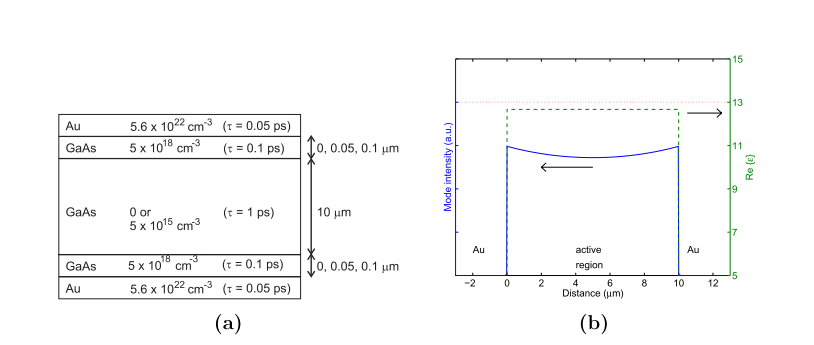

-----------
Initializing structure...
time for choose_chunkdivision = 2.09808e-05 s
Working in 2D dimensions.
Computational cell is 13 x 0.02 x 0 with resolution 50
     block, center = (-5.6,0,0)
          size (1,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-5.05,0,0)
          size (0.1,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.9,10.9,10.9)
     block, center = (0,0,0)
          size (10,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.25,12.25,12.25)
     block, center = (5.05,0,0)
          size (0.1,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.9,10.9,10.9)
     block, center = (5.6,0,0)
          size (1,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1

/home/jiaxin-3/anaconda3/envs/mp/lib/python3.13/site-packages/meep/simulation.py:1660: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/home/jiaxin-3/anaconda3/envs/mp/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jiaxin-3/anaconda3/envs/mp/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jiaxin-3/anaconda3/envs/mp/lib/python3.13/site-packages/matplotlib/transforms.py:2875: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


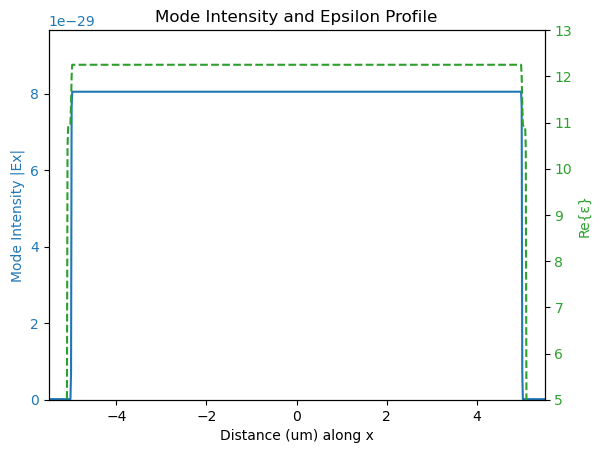

run 1 finished at t = 30.0 (3000 timesteps)


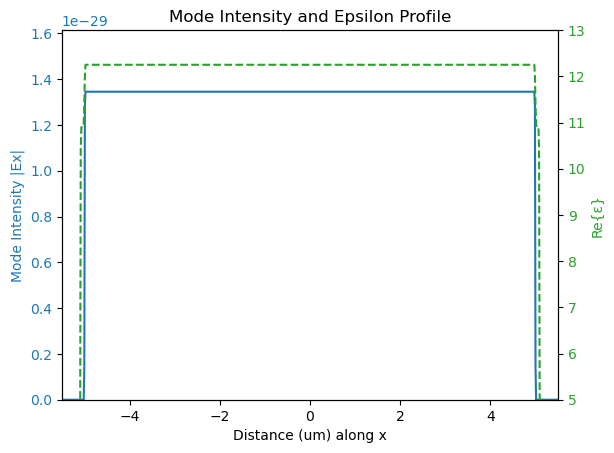

run 2 finished at t = 60.0 (6000 timesteps)


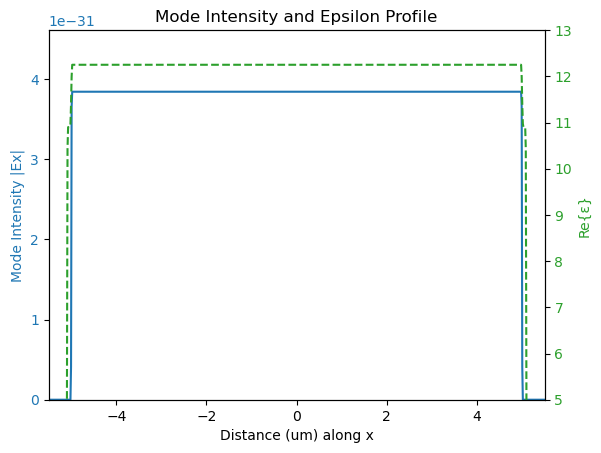

run 3 finished at t = 100.0 (10000 timesteps)


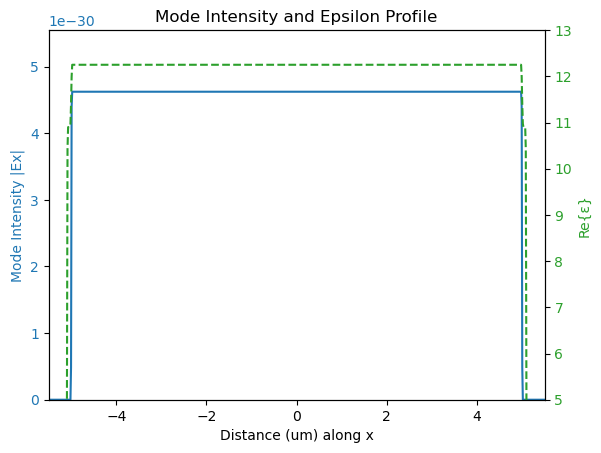

run 4 finished at t = 150.0 (15000 timesteps)


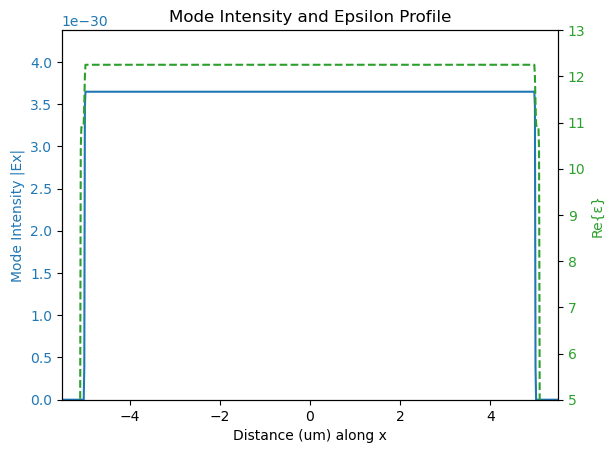

run 5 finished at t = 210.0 (21000 timesteps)


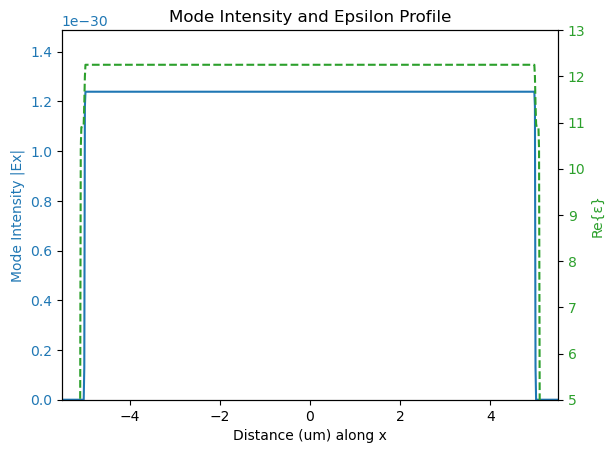

run 6 finished at t = 280.0 (28000 timesteps)


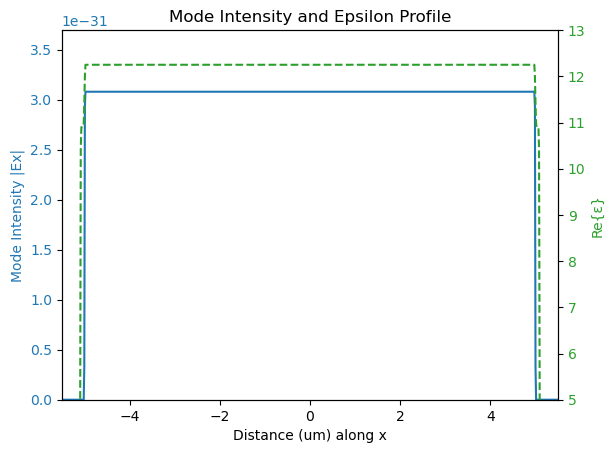

run 7 finished at t = 360.0 (36000 timesteps)


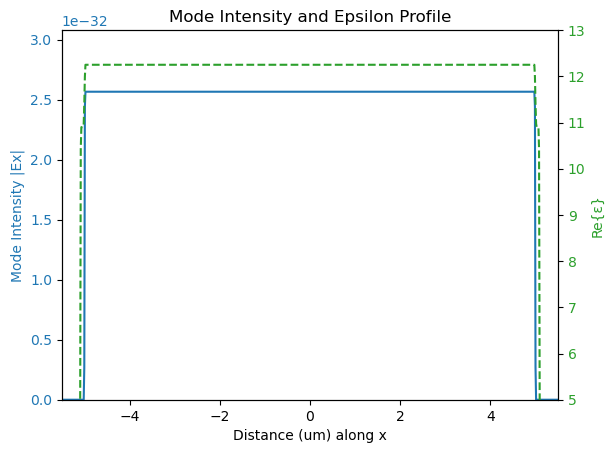

run 8 finished at t = 450.0 (45000 timesteps)


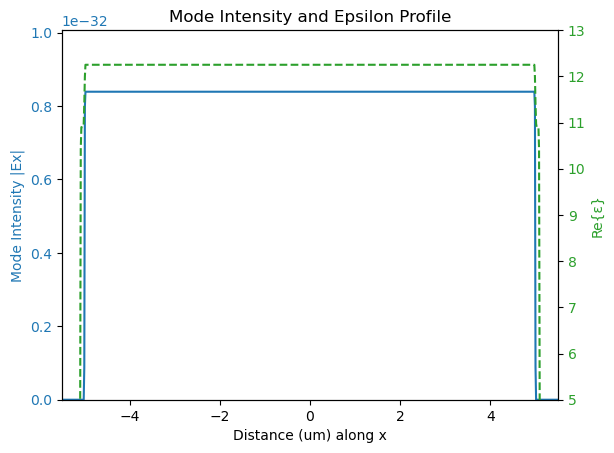

In [32]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import Au

# basic setup (1 μm)
resolution = 50
sx = 13
sy = 0
sz = 5
cell = mp.Vector3(sx, sy, sz)
# Perfectly Matched Layer if THz , set PML to 1
pml_layers = [mp.PML(1)]
# thickness of different layers（1 μm）
Au_thickness = 1
n_GaAs_thickness = 0.1
light_GaAs_thickness = 10

###---------------------------------------------------------------basic config-------------------------------------------------------------------###
# Au = mp.Medium(
#     epsilon=1.0,
#     E_susceptibilities=[
#         mp.DrudeSusceptibility(
#             frequency=5.0,
#             gamma=0.5,    
#             sigma=1.0)])

# N = 5e18
# n_GaAs = mp.Medium(epsilon=12.25)
n_GaAs = mp.Medium(
    epsilon=10.9,
    E_susceptibilities=[
        mp.DrudeSusceptibility(frequency=1.62, 
                               gamma=0.033, 
                               sigma=1.0)])


# N = 5e15 低参杂
# light_GaAs = mp.Medium(epsilon=12.25)
light_GaAs = mp.Medium(
    epsilon=12.25,
    E_susceptibilities=[
        mp.DrudeSusceptibility(frequency=0.0513, 
                               gamma=0.0033, 
                               sigma=1.0)])

# 1e18
nplus_GaAs = mp.Medium(
    epsilon=10.9,  
    E_susceptibilities=[
        mp.DrudeSusceptibility(
            frequency=0.7252,   # Plasma resonant frequency
            gamma=0.0333,       # damping constant
            sigma=1.0           # conductivity
        )
    ]
)

# Set up for source frequency 
frequency = 5e12 # 5THz
# Set up for detector 's observe range
observe_range = 0.1

###-------------------------------------------------------------geometry---------------------------------------------------------------------###
# define the basic height of layers
x0 = -0.5 * (Au_thickness + n_GaAs_thickness + light_GaAs_thickness + n_GaAs_thickness + Au_thickness)

# Construct layers
geometry = []
def add_layer(thickness, material):
    global x0
    center_x = x0 + 0.5 * thickness
    geometry.append(mp.Block(size=mp.Vector3(thickness,mp.inf,mp.inf),center=mp.Vector3(center_x, 0, 0),material=material))
    x0 += thickness

# add_layer(Au_thickness, nplus_GaAs)
# add_layer(2, n_GaAs)
add_layer(Au_thickness, Au)
add_layer(n_GaAs_thickness, n_GaAs)
add_layer(light_GaAs_thickness,light_GaAs)
add_layer(n_GaAs_thickness, n_GaAs)
add_layer(Au_thickness, Au)

###-----------------------------------------------------------source------------------------------------------------------------------------###
# Source
sources = [mp.Source(
            src=mp.ContinuousSource(frequency=frequency,fwidth=0.1*frequency,
                                    start_time=0,end_time=1e1),
                    component=mp.Ex,
                    center=mp.Vector3(0,0,-sz/2),
                    size = mp.Vector3(sx-1,0,0))]

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    # boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2)

# sim.plot2D()
for i in range (10,100,10):
    sim.run(until=i)
    ###-------------------------------------------------------------Plot--------------------------------------------------------------------###

    # 采样 x 方向 Ez 场强
    x = np.linspace(-sx/2, sx/2, 1000)
    eps_data = np.array([sim.get_epsilon_point(mp.Vector3(xi,0)) for xi in x])
    ex_data = np.array([sim.get_field_point(mp.Ex, mp.Vector3(xi))**2/2 for xi in x])

    # === 画图 === #
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Distance (um) along x')
    ax1.set_ylabel('Mode Intensity |Ex|', color=color)
    ax1.plot(x, ex_data, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xlim(-sx/2+1,sx/2-1)
    ax1.set_ylim(0, np.max(ex_data)*1.2)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Re{ε}', color=color)
    ax2.plot(x, eps_data, color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(5, 13)

    plt.title('Mode Intensity and Epsilon Profile')
    plt.show()


## Plot


on time step 56000 (time=560), 0.00580295 s/step
run 11 finished at t = 561.0 (56100 timesteps)


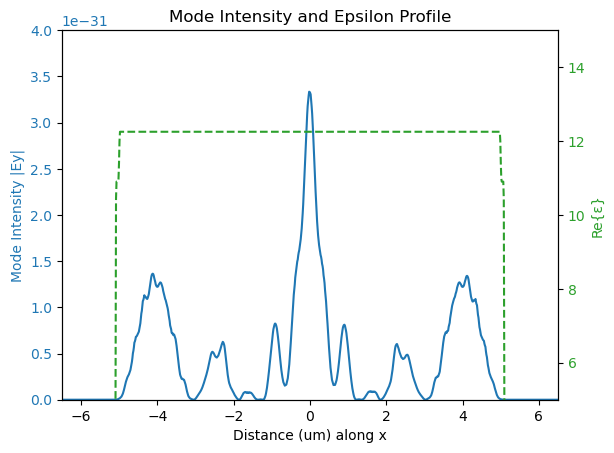

In [31]:
sim.run(until=1)
# 采样 y 方向 Ez 场强
x = np.linspace(-sx/2, sx/2, 1000)
eps_data = np.array([sim.get_epsilon_point(mp.Vector3(xi,0)) for xi in x])
ey_data = np.array([abs(sim.get_field_point(mp.Ey, mp.Vector3(xi))**2/2) for xi in x])

# === 画图 === #
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Distance (um) along x')
ax1.set_ylabel('Mode Intensity |Ey|', color=color)
ax1.plot(x, ey_data, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(-sx/2,sx/2)
ax1.set_ylim(0, np.max(ey_data)*1.2)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Re{ε}', color=color)
ax2.plot(x, eps_data, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(5, 15)

plt.title('Mode Intensity and Epsilon Profile')
plt.show()